### Множественная линейная регрессия: 
Количество пострадавших за 2013-2019г. (по месяцам) + Количество пожаров/ Материальный ущерб

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy as sc
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### 1. Работа с данными

Проведем чистку данных от выбросов с помощью boxplot

In [3]:
data = pd.ExcelFile('data_regression.xlsx')
data = data.parse('Лист1')
data['Количество пожаров, ед'] = data['Количество пожаров, ед'].astype(int)

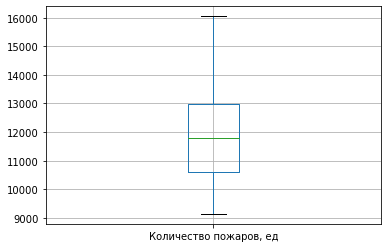

In [4]:
#data.boxplot(column = 'Материальный ущерб, млн')
Q1 =  data['Количество пожаров, ед'].quantile(0.25)
Q3 = data['Количество пожаров, ед'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Количество пожаров, ед'] > Q1-1.5*IQR ) & (data['Количество пожаров, ед']< Q3+1.5*IQR )]
data.boxplot(column="Количество пожаров, ед")

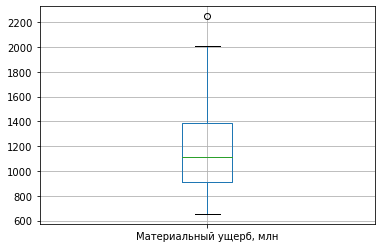

In [5]:
Q1 =  data['Материальный ущерб, млн'].quantile(0.25)
Q3 = data['Материальный ущерб, млн'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Материальный ущерб, млн'] > Q1-1.5*IQR ) & (data['Материальный ущерб, млн']< Q3+1.5*IQR )]
data.boxplot(column="Материальный ущерб, млн")

In [6]:
data

,Дата,"Материальный ущерб, млн","Количество пострадавших, чел","Количество пожаров, ед"
0,2013-01,1385.290,2576,13840
1,2013-02,1189.031,2049,11970
2,2013-03,1147.669,2178,12570
3,2013-04,1040.049,1855,12820
4,2013-05,2247.079,1708,14140
...,...,...,...,...
66,2018-07,680.883,952,9140
67,2018-08,848.724,1095,10000
68,2018-09,1017.661,1075,10130
69,2018-10,781.745,1308,11200


In [7]:
victims = data['Количество пострадавших, чел'] #x1
fires = data['Количество пожаров, ед']#x2
damage = data['Материальный ущерб, млн']#y

#### 2. Парная линейная регрессия кол-во пострадавших/материальный ущерб

In [8]:
victims = victims.values.reshape(-1,1)
damage = damage.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(victims, damage)
damage_pred_1 = linreg.predict(victims)

a_1 = linreg.intercept_
b_1 = linreg.coef_[0]

#коэфф-т детерминации

R2_1 = 1 - (sum(pow(damage - damage_pred_1, 2))/ sum(pow(damage - np.mean(damage), 2)))
print(f"a_1 = {a_1}, b_1 = {b_1}")
print(f"Коэффициент детерминации = {R2_1}")

a_1 = [849.80975205], b_1 = [0.21666217]
Коэффициент детерминации = [0.06066012]


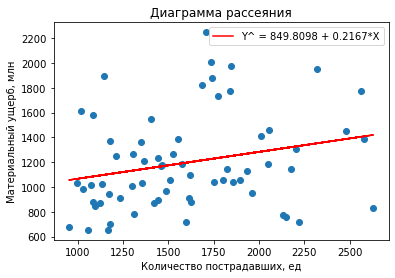

In [9]:
plt.scatter(victims, damage)
plt.plot(victims, damage_pred_1,color = 'red', label = 'Y^ = {} + {}*X'.format(*a_1.round(4),*b_1.round(4)))

plt.xlabel('Количество пострадавших, ед')
plt.ylabel('Материальный ущерб, млн')
plt.legend()
plt.title('Диаграмма рассеяния')
plt.show()

#### Парная линейная регрессия кол-во пожаров/материальный ущерб

In [10]:
fires = fires.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(fires, damage)
damage_pred_2 = linreg.predict(fires)

a_2 = linreg.intercept_
b_2 = linreg.coef_[0]

#коэфф-т детерминации

R2_2 = 1 - sum(pow(damage - damage_pred_2, 2))/ sum(pow(damage - np.mean(damage), 2))
print(f"a_2 = {a_2}, b_2 = {b_2}")
print(f"Коэффициент детерминации = {R2_2}")

a_2 = [388.51644217], b_2 = [0.06823289]
Коэффициент детерминации = [0.07604684]


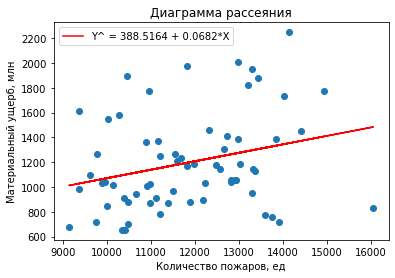

In [11]:
plt.scatter(fires, damage)
plt.plot(fires, damage_pred_2,color = 'red', label = 'Y^ = {} + {}*X'.format(*a_2.round(4),*b_2.round(4)))

plt.xlabel('Количество пожаров, ед')
plt.ylabel('Материальный ущерб, млн')
plt.legend()
plt.title('Диаграмма рассеяния')
plt.show()

#### 3. Исследование модели на наличие мультиколлинеарности факторов с помощью матрицы факторов

In [12]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,"Материальный ущерб, млн","Количество пострадавших, чел","Количество пожаров, ед"
"Материальный ущерб, млн",1.000000,0.246293,0.275766
"Количество пострадавших, чел",0.246293,1.000000,0.801451
"Количество пожаров, ед",0.275766,0.801451,1.000000


#### 4. Вычисление коэффициентов уравнения множественной линейной регрессии в матричной форме, запишем уравнение регрессии в развёрнутой форме.

In [17]:
# xT
X_T = data.drop(['Материальный ущерб, млн', 'Дата'], axis = 1)
X_T = X_T.transpose()
X_T.loc['1'] = int(1)
X_T = X_T.sort_index()
X_T

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,71
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Количество пожаров, ед",13840,11970,12570,12820,14140,12180,10990,11210,11400,13330,...,9610,9970,10900,12230,10280,9140,10000,10130,11200,13590
"Количество пострадавших, чел",2576,2049,2178,1855,1708,1444,1121,1210,1420,1821,...,1620,1750,1351,1356,1082,952,1095,1075,1308,2133


In [18]:
#xTx
X = X_T.transpose()
xTx = X_T.to_numpy() @ X.to_numpy()
xTx

array([[        66,     781370,     105555],
       [    781370, 9405960500, 1284682910],
       [    105555, 1284682910,  181107567]], dtype=int64)

In [19]:
#xTy
xTy = X_T.to_numpy() @ damage
xTy

array([[7.89572190e+04],
       [9.45370967e+08],
       [1.28940827e+08]])

In [20]:
#xTx(-1)
xTx = np.asmatrix(xTx)
xTx_inv = np.linalg.inv(xTx)
xTx_inv

matrix([[ 1.17742137e+00, -1.31035062e-04,  2.43257595e-04],
        [-1.31035062e-04,  1.79948192e-08, -5.12746701e-08],
        [ 2.43257595e-04, -5.12746701e-08,  2.27459502e-07]])

In [21]:
#оценка_параметров
beta = xTx_inv @ xTy
beta= np.squeeze(np.asarray(beta))

In [22]:
beta

array([4.55009741e+02, 5.42172051e-02, 6.21749659e-02])

In [23]:
print(f'Уравнение регрессии: Y^ = {beta[0]:.3f} + {beta[1]:.3f} * X_1 + {beta[2]:.3f} * X_2')

Уравнение регрессии: Y^ = 455.010 + 0.054 * X_1 + 0.062 * X_2


#### 5.	Расчетные значения показателя и остатки

In [24]:
damage_pred_xx = beta[0] + beta[1]*fires + beta[2]*victims

E_x1 = damage - damage_pred_2
E_x2 = damage - damage_pred_1
E_xx = damage - damage_pred_xx

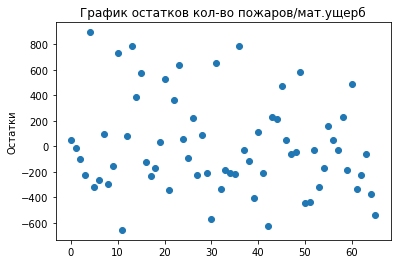

In [25]:
n = [i for i in range(0,len(damage))]
plt.scatter(n, E_x1)

plt.ylabel('Остатки')
plt.title('График остатков кол-во пожаров/мат.ущерб')
plt.show()

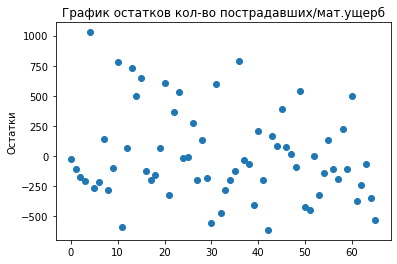

In [26]:
n = [i for i in range(0,len(damage))]
plt.scatter(n, E_x2)

plt.ylabel('Остатки')
plt.title('График остатков кол-во пострадавших/мат.ущерб')
plt.show()

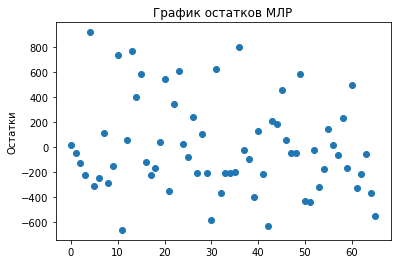

In [27]:
n = [i for i in range(0,len(damage))]
plt.scatter(n, E_xx)

plt.ylabel('Остатки')
plt.title('График остатков МЛР')
plt.show()

#### 6.	Вычисление и сравнение частных и парных коэффициентов корреляции.

In [28]:
# парные корреляции

r_yx1 = 0.275766
r_yx2 = 0.246293
r_x1x2 = 0.801451

#частные корреляции

r_yx1_x2 = (r_yx1 - r_yx2*r_x1x2)/pow((1 - pow(r_yx2,2))*(1 - pow(r_x1x2,2)), 0.5)
r_yx2_x1 = (r_yx2 - r_yx1*r_x1x2)/pow((1 - pow(r_yx1,2))*(1 - pow(r_x1x2,2)), 0.5)
print(f'КЧК:\n r_yx1|x2 = {r_yx1_x2} \n r_yx2|x1 = {r_yx2_x1}')

КЧК:
 r_yx1|x2 = 0.1352125021438009 
 r_yx2|x1 = 0.04397522959957751


#### 7.	Найдем величину средней относительной ошибки аппроксимации и оценку для дисперсии остатков.

In [29]:
#средняя относительная ошибка аппроксимации

A = sum(abs(damage - damage_pred_xx)/abs(damage))*1/len(damage)*100
print(*A)

25.53826897420431


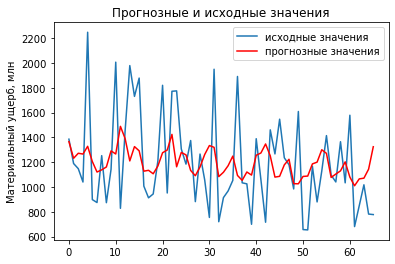

In [30]:
plt.plot(n, damage, label = 'исходные значения')
plt.plot(n, damage_pred_xx,color = 'red', label = 'прогнозные значения')

plt.ylabel('Материальный ущерб, млн')
plt.legend()
plt.title('Прогнозные и исходные значения')
plt.show()

#### 8.	Вычислим множественный коэффициент детерминации и сравним его  с коэффициентами детерминации найденных ранее ПЛ. Вычислим коэффициент детерминации Тейла.

In [31]:
R_xx = 1 - sum(pow(damage - damage_pred_xx, 2))/sum(pow(damage - np.mean(damage),2))
print('Множественный коэфф. детерминации = ', R_xx)
print(f"Коэффициент детерминации пострадавшие/ущерб= {R2_1}")
print(f"Коэффициент детерминации пожары/ущерб= {R2_2}")

Множественный коэфф. детерминации =  [0.07783357]
Коэффициент детерминации пострадавшие/ущерб= [0.06066012]
Коэффициент детерминации пожары/ущерб= [0.07604684]


In [32]:
# Коэффициент Тейла
n = len(damage)
R_adj = 1 -(1 - R_xx)*(n-1)/(n-2)
print('Коэффициент детерминации Тейла = ', R_adj)

Коэффициент детерминации Тейла =  [0.06342472]


In [33]:
n

66

#### 9. Проверим статистическую значимость полученных значений параметров регрессии с помощью критерия Стьюдента и критерия Фишера.

In [34]:
# Критерий Фишера

F = pow(R_xx,2) * (n - 2 - 1)/((1 - pow(R_xx, 2))* 2)
F_cr = 3.15 #F(2, 63)

print('F_stat = ', *F, '< F_cr = ', F_cr, ' => Н0 принимается => построение уравнения МЛР признается статистически не значимым')

F_stat =  0.19199213673586416 < F_cr =  3.15  => Н0 принимается => построение уравнения МЛР признается статистически не значимым


In [35]:
# Критерий Стьюдента

s_res = pow(sum(pow(E_xx, 2))/(len(damage)- 2 - 1), 0.5)

m_b1 = s_res * pow(xTx_inv[1,1], 0.5)
m_b2 = s_res * pow(xTx_inv[2,2], 0.5)
m_a = s_res * pow(xTx_inv[0,0], 0.5)

t_b1 = beta[1]/m_b1
t_b2 = beta[2]/m_b2
t_a = beta[0]/m_a

t_cr = 1.998340543
print(s_res, m_b1, m_b2, m_a, t_b1, t_b2, t_a)

[373.13753181] [0.05005445] [0.17795942] [404.88798761] [1.08316458] [0.34937722] [1.12379165]


In [36]:
print("t_a = ", t_a, "< t_cr = ", t_cr)
print("t_b1 = ", t_b1, "< t_cr = ", t_cr)
print("t_b2 = ", t_b2, "< t_cr = ", t_cr)

t_a =  [1.12379165] < t_cr =  1.998340543
t_b1 =  [1.08316458] < t_cr =  1.998340543
t_b2 =  [0.34937722] < t_cr =  1.998340543


H0 (β=0) принимается, оценки a, b1, b2 параметров a, β1, β2,  статистически не значимы

#### 10. Построим точечный прогноз значения y для фиксированного x. Вычислим стандартную ошибку и доверительный интервал полученного прогноза.

In [37]:
x_fix_1 = fires[30]
x_fix_2 = victims[30]
print(x_fix_1, x_fix_2)

[13750] [2146]


In [38]:
x_fix_1 = fires[30]
x_fix_2 = victims[30]

n = len(victims)

y_p = beta[0] + beta[1] * x_fix_1 + beta[2] * x_fix_2
print("Прогнозное значение ",y_p, "Реальное значение ", damage[30])

Прогнозное значение  [1333.92378826] Реальное значение  [754.519]


In [39]:
x = np.array([1, *x_fix_1, *x_fix_2])
x_T = x.transpose()
x_T = x_T.reshape(1,3)
x = x.reshape(3,1)

dot = x_T * xTx_inv * x
dot = np.squeeze(np.asarray(dot))

s_e = s_res * pow(dot, 0.5)
print("Оценка среднеквадратического отклонения", s_e)

Оценка среднеквадратического отклонения [76.20826559]


In [40]:
# доверительный интервал
print(y_p - t_cr*s_e, " ∈ y_p ∈ ", y_p + t_cr*s_e)

[1181.63372142]  ∈ y_p ∈  [1486.2138551]
